# My first simulation

As a minimal example of setting up a simulation using rumdpy,
let us simulation of a Lennard-Jones crystal in the constant $NVT$ ensemble.

If rumdpy is installed correctly, the following code should run without any errors.

In [1]:
import rumdpy as rp

We will also import NumPy for numerical calculations and Matplotlib for plotting.

In [2]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting

Next, we set up a configuration of a FCC lattice with $8 \times 8 \times 8$ unit cells, with a density of $\rho = 0.973$ and temperature $T = 2\times 0.8$.
Below, we use the `make_configuration_fcc` function to create a configuration object.


In [3]:
# Setup configuration: FCC Lattice
configuration = rp.make_configuration_fcc(nx=8, ny=8, nz=8, rho=0.973, T=2*0.8)

We can visualize the configuration using Matplotlib. The positions can be accessed with the `get_vector` method using the `r` attribute. All vector properties are NumPy arrays.

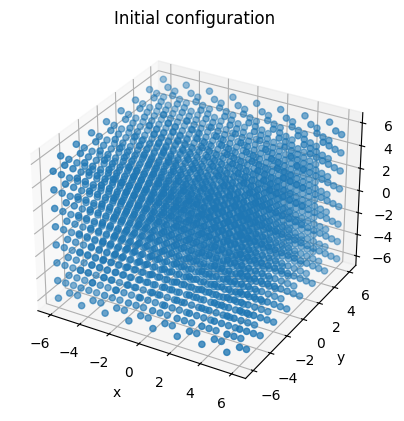

In [4]:
# Make 3D plot using matplotlib
r = configuration.get_vector('r')  # Get positions

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Initial configuration')
ax.scatter(r[:,0], r[:,1], r[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Next, we set up the pair potential and integrator for the simulation.

In [5]:
# Setup pair potential: Single component 12-6 Lennard-Jones
pairfunc = rp.apply_shifted_force_cutoff(rp.LJ_12_6_sigma_epsilon)
sig, eps, cut = 1.0, 1.0, 2.5
pairpot = rp.PairPotential2(pairfunc, params=[sig, eps, cut], max_num_nbs=1000)

# Setup integrator: NVT
integrator = rp.integrators.NVT(temperature=0.70, tau=0.2, dt=0.005)

We now have all the components to set up a simulation object. 

In [6]:
# Setup Simulation. 
sim = rp.Simulation(
    configuration=configuration,
    interactions=pairpot,
    integrator=integrator,
    num_steps=32*1024, 
    storage='LJ_T0.70.h5'
)

num_steps:  32768
num_blocks:  32
steps_per_block:  1024


Finally, we run the simulation using the `run` method.

In [7]:
sim.run()  # Run simulation

time= 0.000     u= -5.850    w= 1.161     lap= 971.975   m= 1.000     k= 1.081     fsq= 650.625   
time= 5.120     u= -5.796    w= 1.459     lap= 997.703   m= 1.000     k= 1.033     fsq= 745.959   
time= 10.240    u= -5.811    w= 1.382     lap= 990.547   m= 1.000     k= 1.060     fsq= 688.222   
time= 15.360    u= -5.837    w= 1.230     lap= 978.129   m= 1.000     k= 1.058     fsq= 677.705   
time= 20.480    u= -5.806    w= 1.420     lap= 993.485   m= 1.000     k= 1.046     fsq= 683.138   
time= 25.600    u= -5.838    w= 1.229     lap= 977.742   m= 1.000     k= 1.050     fsq= 672.797   
time= 30.720    u= -5.804    w= 1.411     lap= 993.618   m= 1.000     k= 1.052     fsq= 739.155   
time= 35.840    u= -5.814    w= 1.359     lap= 988.371   m= 1.000     k= 1.036     fsq= 673.491   
time= 40.960    u= -5.829    w= 1.289     lap= 982.953   m= 1.000     k= 1.041     fsq= 664.149   
time= 46.080    u= -5.798    w= 1.468     lap= 997.344   m= 1.000     k= 1.012     fsq= 691.689   
time= 51.2